In [1]:
import numpy as np#load ice cube data
from scipy.optimize import minimize
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [2]:
files=["IC40_exp_new.csv","IC59_exp_new.csv","IC79_exp_new.csv","IC86_I_exp_new.csv","IC86_II_exp_new.csv", 
       "IC86_III_exp_new.csv","IC86_IV_exp_new.csv","IC86_V_exp_new.csv","IC86_VI_exp_new.csv",
       "IC86_VII_exp_new.csv"]

In [3]:
columns = ["MJD", "log10E_GeV", "AngErr_deg", "RA_deg", "Dec_deg", "Azimuth_deg", "Zenith_deg"]
d1 = pd.read_csv("IC40_exp_new.csv", delim_whitespace=True, comment='#', header=None)
d1.columns = columns
d2 = pd.read_csv("IC59_exp_new.csv", delim_whitespace=True, comment='#', header=None)
d2.columns = columns
d3 = pd.read_csv("IC79_exp_new.csv", delim_whitespace=True, comment='#', header=None)
d3.columns = columns
d4 = pd.read_csv("IC86_I_exp_new.csv", delim_whitespace=True, comment='#', header=None)
d4.columns = columns
d5 = pd.read_csv("IC86_II_exp_new.csv", delim_whitespace=True, comment='#', header=None)
d5.columns = columns
d6 = pd.read_csv("IC86_III_exp_new.csv", delim_whitespace=True, comment='#', header=None)
d6.columns = columns
d7 = pd.read_csv("IC86_IV_exp_new.csv", delim_whitespace=True, comment='#', header=None)
d7.columns = columns
d8 = pd.read_csv("IC86_V_exp_new.csv", delim_whitespace=True, comment='#', header=None)
d8.columns = columns
d9 = pd.read_csv("IC86_VI_exp_new.csv", delim_whitespace=True, comment='#', header=None)
d9.columns = columns
d0 = pd.read_csv("IC86_VII_exp_new.csv", delim_whitespace=True, comment='#', header=None)
d0.columns = columns
#print(d1)

In [4]:
combined_df = pd.concat([d5, d6, d7, d8, d9, d0])
#print(combined_df)
len(combined_df)

761143

In [6]:
zen1=(d1["Zenith_deg"])
zen2=(d2["Zenith_deg"])
zen3=(d3["Zenith_deg"])
zen4=(d4["Zenith_deg"])
zen86_2to8=(combined_df["Zenith_deg"])
#print(zen86_2to8)
cos_zen1=np.cos(np.radians(zen1))
#print(cos_zen1)
cos_zen2=np.cos(np.radians(zen2))
cos_zen3=np.cos(np.radians(zen3))
cos_zen4=np.cos(np.radians(zen4))
cos_zen_comb=np.cos(np.radians(zen86_2to8))
#print(cos_zen_comb)

In [7]:
dec1=d1["Dec_deg"]
#print(dec1)
dec2=d2["Dec_deg"]
dec3=d3["Dec_deg"]
dec4=d4["Dec_deg"]
dec86_2to8=combined_df["Dec_deg"]
#print(np.sin(dec86_2to8))

In [8]:
#print(f"d1: {len(d1)}")
#print(f"d2: {len(d2)}")
#print(f"d3: {len(d3)}")
#print(f"d4: {len(d4)}")
#print(f"combined:{len(combined)}")


In [9]:
data=np.loadtxt("IC40_exp_new.csv")
for name in files[1:]:#indexing the list
    da=np.loadtxt(name)
    data=np.vstack((data,da))#load everyfile
mjd,log10_E,Ang_err,RA,Dec,Azim,Zenith=data.T
len(RA)   

1134431

In [10]:
fields=[log10_E,RA,Dec,Ang_err]
#print(zenith)
iceang=fields[3]
#zenith=fields[4]
#len(zenith)

In [11]:
ice_ra_deg=(fields[1])
ice_dec_deg=(fields[2])
print(ice_ra_deg)
print(ice_dec_deg)

[203.024  75.024  97.501 ... 308.127 332.199 213.309]
[ 16.76  -13.371  11.29  ...  42.543  44.72    4.708]


In [12]:
np.random.seed(0)
N=1000
random_ra=np.random.uniform(0,360,N)
#print(random_ra)
random_dec=np.random.uniform(np.sin(np.radians(-85)),np.sin(np.radians(85)),N)
random_dec = np.degrees(np.arcsin(random_dec))

#print(random_dec)

In [13]:

declcut = 5 
band = 5     

def angular_separation(ra1, dec1, ra2, dec2):
    delta_ra = ra1 - ra2
    return np.arccos(np.sin(dec1) * np.sin(dec2) + np.cos(dec1) * np.cos(dec2) * np.cos(delta_ra))

def sig(ra_rand_deg,dec_rand_deg,ra_rand_rad,dec_rand_rad,ice_ra1_rad,ice_dec1_rad,iceang,declcut):
        decdiff=np.abs(ice_dec_deg-dec_rand_deg)
        nuind=np.nonzero(decdiff < declcut)
        sg=np.radians(iceang[nuind])**2
        Ang_sep1=(np.arccos((np.sin(ice_dec1_rad[nuind])*np.sin(dec_rand_rad)+np.cos(ice_dec1_rad[nuind])*np.cos(dec_rand_rad)*np.cos(ice_ra1_rad[nuind]-ra_rand_rad))))**2
        return ((np.exp(-1*Ang_sep1/(2*sg)))/(2*np.pi*sg))
def bgs(dec_rand_deg, twopi = True):
        if twopi == True:
            s_ang = (np.sin(np.radians(dec_rand_deg + band)) - np.sin(np.radians(dec_rand_deg- band)))*(2 * np.pi)
            return 1/s_ang
        else:
            s_ang = (np.sin(np.deg2rad(dec_rand_rad + band)) - np.sin(np.deg2rad(dec_rand_rad- band)))
            return 1/s_ang

def P(x, N, S, B):
    nsN = x / N
    return nsN * S + (1 - nsN) * B

def TS(x, N, S, B):
    return 2 * np.sum(np.log(P(x, N, S, B) / B))
def ns_for_TSmax(dec_rand_deg,ra_rand_rad,dec_rand_rad,ice_ra1_rad,ice_dec1_rad,iceang, declcut, band):
        B= bgs(dec_rand_deg, twopi = True)
        S =sig(ra_rand_deg,dec_rand_deg,ra_rand_rad,dec_rand_rad,ice_ra1_rad,ice_dec1_rad,iceang,declcut)
        decdiff=np.abs(ice_dec_deg-dec_rand_deg)
        nuind=np.nonzero(decdiff < declcut)
        N = len(nuind[0])
        if N == 0:
            return 0, 0, 0
        nll = lambda x: -TS(x,N,S,B)
        soln = minimize(nll,6,bounds=((0,None),))
        ns = float(soln.x)
        TS_val = TS(ns, N, S, B)
        return ns,N,TS_val

ice_ra1_rad = np.radians(ice_ra_deg)
ice_dec1_rad = np.radians(ice_dec_deg)

Ts_values = []
sqrt_TS = []
Background = []

for i in range(1000):
    ra_rand_deg = random_ra[i]
    dec_rand_deg = random_dec[i]
    ra_rand_rad = np.radians(ra_rand_deg)
    dec_rand_rad = np.radians(dec_rand_deg)
    
    ns, N, TS_value =ns_for_TSmax(dec_rand_deg,ra_rand_rad,dec_rand_rad,ice_ra1_rad,ice_dec1_rad,iceang, declcut, band)

    B = bgs(dec_rand_deg, twopi=True)
    
    Ts_values.append(TS_value)
    sqrt_TS.append(np.sqrt(TS_value))
    Background.append(B)

    print(i, N, B, ns, TS_value, sep="|")


0|149795|0.9290960493896501|1.0656221514849964e-10|1.3276046928389502e-11
1|14206|4.205184931558124|0.0|0.0
2|121808|0.9141099515071275|0.0|0.0
3|107438|1.0040274175677706|19.137676882325582|2.2845439502069405
4|30544|2.185822909745214|6.443904609555999|2.299407931656333
5|58126|1.3952609984776747|13.552078790943641|2.2010701960215533
6|164959|0.9137807725038094|2.6090506160802134|0.0546721529475277
7|24727|2.5765543960232375|0.39006505780131606|0.00985452513451203
8|67997|1.0924608536915381|0.0|0.0
9|34693|2.134555561140799|0.0|0.0
10|154740|0.9255831666861813|21.68965312807962|2.9407996731062873
11|47451|1.4651127464625628|4.258113944023999|0.9416346412620511
12|76124|1.0077889717851718|0.0|0.0
13|99550|0.916465324340334|0.0|0.0
14|20715|3.0602456584193307|0.0|0.0
15|76286|0.9275438714731422|0.0|0.0
16|137048|0.9132505312982164|0.0|0.0
17|71891|1.061977828500304|0.0|0.0
18|151590|0.927629483761204|0.0|0.0
19|93306|1.0575277195060546|0.0|0.0
20|70347|1.0738142203402832|0.8541698756113

175|111479|0.9930160472426371|26.32029135226734|4.088578877210075
176|76724|0.9359942384821721|0.0|0.0
177|74761|1.0348380883892188|0.0|0.0
178|38319|1.9680403281321721|0.0|0.0
179|51348|1.3279593193204606|0.0|0.0
180|104219|1.0161273619736901|0.0|0.0
181|45054|1.7204245426142768|0.0|0.0
182|122092|0.9665468301631501|26.36815624157444|3.579655312240569
183|77223|0.9239715050401361|0.0|0.0
184|62309|1.1410197130506858|0.0|0.0
185|77355|0.9466440459410584|0.0|0.0
186|108122|1.0021312176269581|0.0|0.0
187|126932|0.9564853919975845|7.459625736014335|0.3732469993948995
188|44182|1.747767493618317|12.902996131427495|1.7560604086197367
189|61423|1.3378936593931412|0.0|0.0
190|74775|1.1755795484699076|29.109371339733194|6.76589782195264
191|49390|1.5943098442178238|0.0|0.0
192|75930|1.019915326792435|5.469616144774674|1.0570382524580086
193|77281|0.9455579300300515|0.0|0.0
194|76904|0.9403704783808239|0.0|0.0
195|164022|0.9197443929929878|6.46375581977833|0.28717683308399755
196|121063|0.96909

337|168251|0.914444263037155|21.78062328194968|3.1530674743506015
338|70731|1.0712017340516733|7.669336226157008|2.7018259097688095
339|75763|1.025712993476566|7.677227440431815|2.1882058409610106
340|74037|1.0421161458982346|5.617634289825567|1.164108613411198
341|169292|0.9149480559660015|0.0|0.0
342|109415|0.9985321905013892|20.780468604000404|2.0828244670730953
343|36499|2.04818672561393|11.48399811183599|1.2088310100754769
344|112556|0.9900700408882868|0.0|0.0
345|84729|1.102281610345835|8.412978678820588|0.7787805588185
346|56806|1.214819869129817|0.0|0.0
347|77218|0.9432239664743305|0.34070496273610634|0.006198360786564626
348|76617|0.926826600251386|1.8394731151018227|0.16007164269346102
349|114958|0.9833633420641206|0.0|0.0
350|76078|0.999420626356082|0.0|0.0
351|76406|0.9924449982740736|2.5411183271697855|0.2689368679580862
352|77387|0.9531846977053797|12.91841095597363|5.109123603419232
353|76338|1.161658757006701|4.524765765766531|0.16572338400403347
354|156903|0.9241586205

498|29872|2.223375534050367|5.753666643619602|1.6781240178662185
499|68682|1.086845849219337|1.442742646803736|0.09164868173137419
500|89988|0.9182230635616028|0.0|0.0
501|69131|1.2320509277754914|0.0|0.0
502|67590|1.0969396904648283|7.890334089748842|2.6271011802101945
503|141510|0.9131155326955589|0.0|0.0
504|43620|1.7659530003132695|0.0|0.0
505|121350|0.9683707200432977|16.170185048613224|2.0116690727225235
506|79594|1.134861609940213|6.524033790405966|0.5470527001478658
507|167442|0.9177983772906029|13.096397628581261|0.9090705760431053
508|21326|3.157428467226732|0.0|0.0
509|151589|0.9276372857298729|0.0|0.0
510|31099|2.1518729709869846|0.0|0.0
511|62083|1.1431759496052847|0.2126378557065111|0.002468130884591982
512|75491|0.9299398776639483|0.0|0.0
513|146194|0.9322248264179582|1.036886251647439|0.009207601850706126
514|87554|1.0863004485419916|1.468721617539458|0.019461412978865368
515|76555|0.9270544694153424|0.0|0.0
516|106909|1.0053297882325412|2.3056298754345397|0.05681473380

664|166083|0.9186203742865889|0.0|0.0
665|76612|0.9258162766363723|0.0|0.0
666|75431|0.9315489561849977|0.0|0.0
667|112113|0.9912049621199281|10.853041104635155|0.8236818633722502
668|45344|1.5613807516222074|1.1999299415904554|0.06990040447472357
669|56208|1.2216391823115393|4.496116895667978|1.05615073379302
670|65472|1.2780406852952644|0.0|0.0
671|87826|1.084888713388956|0.0|0.0
672|76222|1.0142477454427177|0.0|0.0
673|77132|0.9416350463476948|0.0|0.0
674|44829|1.7269802423354286|0.0|0.0
675|74260|1.1803342488640696|1.2963141788935706|0.021277653422905708
676|140559|0.937708272415096|0.0|0.0
677|67543|1.0975241967644462|0.0|0.0
678|30647|2.179580461527981|0.0|0.0
679|80073|0.9217351326596223|0.0|0.0
680|119600|0.9723721002792143|1.98128773783643|0.025187566366975833
681|71373|1.2075839925809233|17.9373103248589|2.567882933162589
682|65112|1.283287276985716|0.0|0.0
683|25687|2.499493453214963|0.0|0.0
684|71978|1.0612787325982753|0.0|0.0
685|78164|0.9639257320715836|0.0|0.0
686|60374|

835|77818|0.9818173434244833|5.435772747887176|1.1757377406573306
836|146795|0.9315685225448628|5.562083922598702|0.27010146415647446
837|79639|0.9220134873829094|0.0|0.0
838|50087|1.575962712033265|0.0|0.0
839|60129|1.1671306167995033|0.0|0.0
840|111339|0.9933829483110792|0.0|0.0
841|26826|2.6171550775004575|0.0|0.0
842|58006|1.1974273000790463|0.0|0.0
843|62989|1.1347673451321472|0.0|0.0
844|112638|0.9897439955423306|0.0|0.0
845|85356|1.098656524521985|0.0|0.0
846|138160|0.9132110011611433|0.0|0.0
847|142538|0.9356656192771539|0.0|0.0
848|65393|1.1135550794744462|0.0|0.0
849|122668|0.9140418025601249|0.0|0.0
850|48197|1.4389531949727443|3.063546289911477|0.37176349406469317
851|78046|0.9769794593326678|0.0|0.0
852|76208|1.0106828781088306|0.0|0.0
853|88221|0.9186572629212766|0.0|0.0
854|43452|1.7717033687858137|0.0|0.0
855|59056|1.1819709651165817|0.0|0.0
856|75368|0.9311988696997667|2.604978944051964|0.4049360195538031
857|140133|0.9382734388155118|0.0|0.0
858|37633|2.00004085372903

999|149439|0.9130547870147678|10.830879204354975|0.8166638576796418


In [15]:
ts=np.array(Ts_values)
ts1=ts[ts>5.3]

print(len(ts1))

9


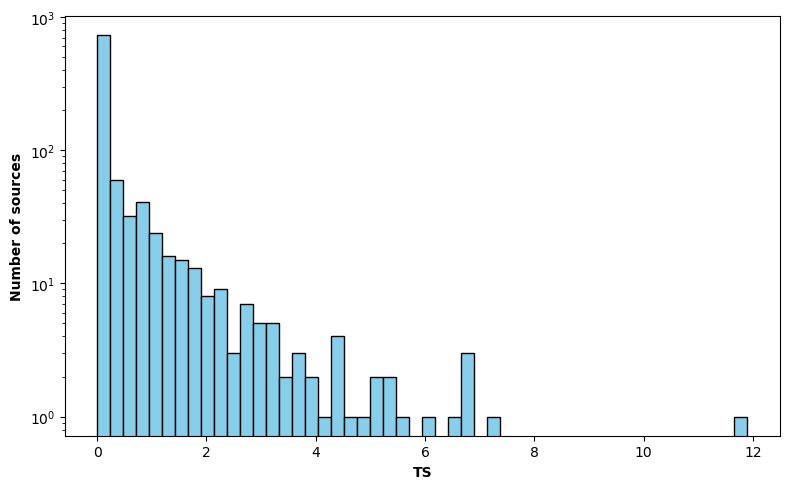

In [16]:
plt.figure(figsize=(8, 5))
plt.hist((Ts_values), bins=50,log=True, color='skyblue', edgecolor='black')
plt.xlabel('TS', fontweight='bold')
plt.ylabel('Number of sources', fontweight='bold')
plt.tight_layout()

# Save as PDF
plt.savefig("ts_histogram1_plot.pdf")
plt.show()

In [17]:
f = len(random_ra)#print(p)
binnedsts, wsts = np.histogram(sqrt_TS, 15)# Creates a histogram of `sqrt_TS` with 10 bins.

#ne01 = 20
amp  = f/13#np.sum(binnedsts)/ne01
#binnedsts = binnedsts/amp
yerr = np.sqrt(binnedsts)
b2 = binnedsts[(binnedsts>10)]# Filters bins with more than 10 events.
yerr2 = yerr[(binnedsts>10)]# Filters y-errors for bins with >10 events.
x=0.5*(wsts[1:]+ wsts[:-1])# Computes bin centers.
x2 = x[(binnedsts>10)] # Filters bin centers with >10 events.
xerr=x[0]-wsts[0]# Error in x, assumed as bin width.
mean_guess = np.mean(sqrt_TS)
sd_guess = np.std(sqrt_TS)
print(mean_guess)
print(sd_guess)

0.3246051368611866
0.5470378076926617


In [18]:
def gaussian(x,mean,sd):
    '''Returns the gaussian PDF value at for the given mean and standard deviation'''
#    mean=0.114
    A=f/13
    return A*np.exp(-(x - mean) ** 2.0 / sd ** 2.0)
loggaussian = lambda x, mean, var:  np.log(gaussian(x, mean, var))
gparam, gerr = curve_fit(gaussian, x2, b2,  p0=[0.1, 0.4],sigma=yerr2, absolute_sigma=True, maxfev = 10000, method='dogbox')
gx = np.linspace(0, wsts[-1], 100)# Creates x-values for a smooth Gaussian plot.

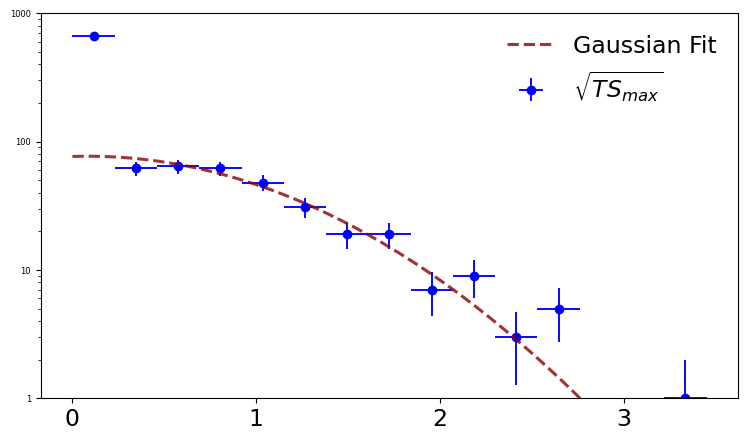

In [19]:
plt.figure(figsize=(9,5))
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], fontsize=17)
plt.yscale('log')
plt.yticks([1, 10, 100, 1000, 10000], [1, 10, 100, 1000, 10000], fontsize=6)
plt.ylim(1, 1000)
plt.errorbar(x, binnedsts, xerr=xerr,yerr=yerr,  aa = True, barsabove = True, fmt='ob',ecolor='blue', elinewidth=1.35, label='$\sqrt{TS_{max}}$')
plt.plot(gx,gaussian(gx, gparam[0], gparam[1]),'--', alpha=0.8, label=f'Gaussian Fit', color='darkred', lw=2.2)

#plt.xlabel("$\mathbf{\sqrt{TS_{max}}}$", fontweight='bold', fontdict=font)
#plt.ylabel("No.of Events", fontweight='bold', fontdict=font)
#plt.grid(True, which='major')
legend =plt.legend(prop={'size':17}, framealpha=0)
legend.get_frame().set_facecolor('none')
#plt.savefig("outputs/sqrt(TSmax)final.jpg")
plt.show()

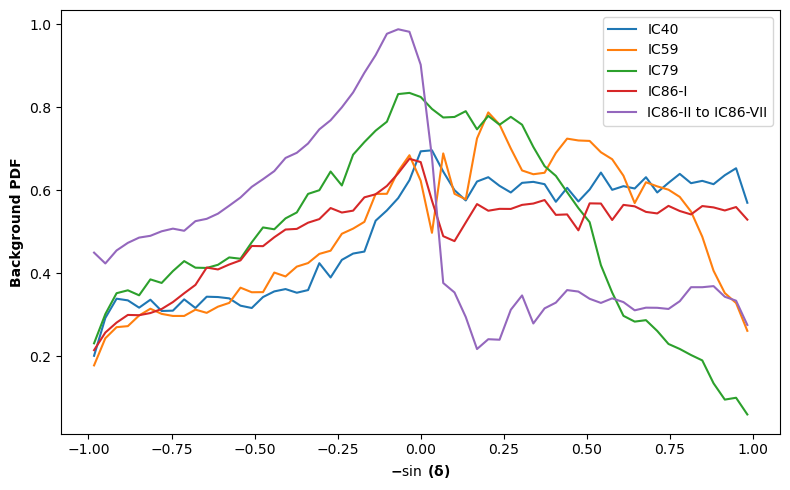

In [30]:
plt.figure(figsize=(8, 5))
labels = ["IC40", "IC59", "IC79", "IC86-I", "IC86-II to IC86-VII"]
bins1 = np.linspace(-1, 1, 60)
xcentre = 0.5 * (bins1[1:] + bins1[:-1])  # bin centres

datas2 = [d1, d2, d3, d4, pd.concat([d5, d6, d7, d8, d9, d0])]

def B_i(datasdec):
    return -np.sin(np.radians(datasdec["Dec_deg"]))

for datasdec, label in zip(datas2, labels):
    sindec = B_i(datasdec)
    hist, _ = np.histogram(sindec, bins1, density=True)
    plt.plot(xcentre, hist, label=label)


plt.xlabel(r'$\mathbf{-\sin\;(\delta)}$', fontweight='bold')

plt.ylabel("Background PDF", fontweight='bold')
plt.legend()
plt.tight_layout()  # Optional: better layout spacing

plt.savefig("bg_ic_new12.pdf")  # Save before show
plt.show()
